In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_science_job.csv')

In [3]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,24.0,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,123.0,0.0


In [5]:
df.isnull().mean()*100
#checking percentage of missing values in every column

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
df.isnull().sum()
#checking how much values are missing in each column

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [12]:
df.shape
#checking shape

(19158, 13)

## observation before applying cca

<AxesSubplot: >

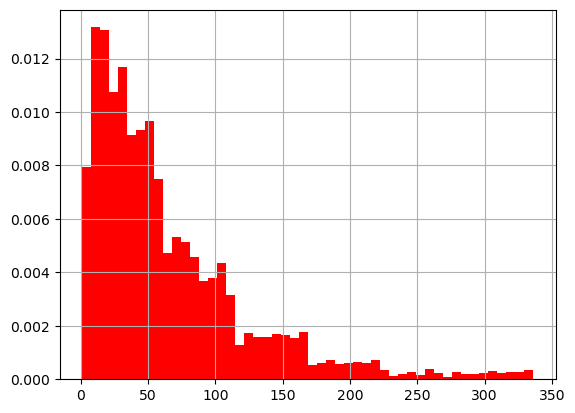

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

<AxesSubplot: >

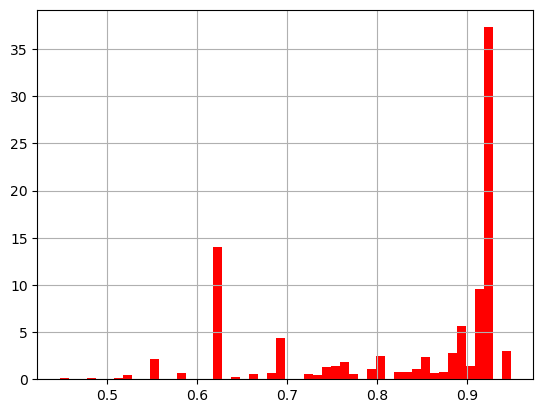

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

<AxesSubplot: >

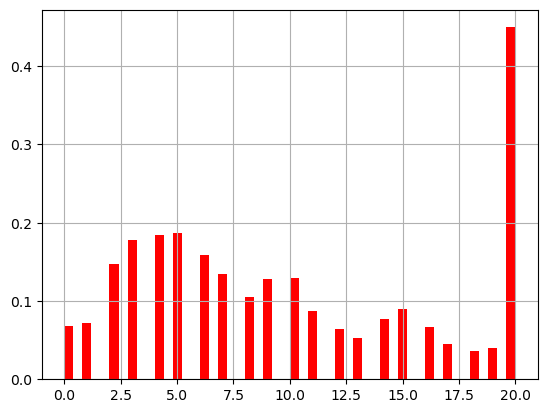

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

C:\Users\zuhai\anaconda3\envs\AI\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot: ylabel='Density'>

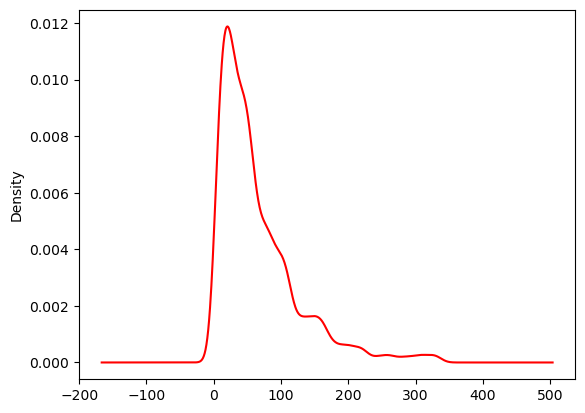

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

<AxesSubplot: ylabel='Density'>

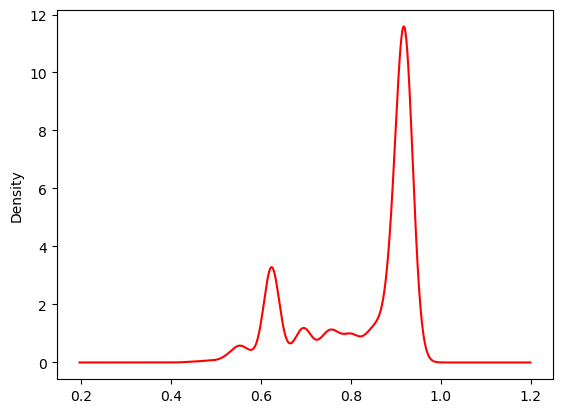

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

<AxesSubplot: ylabel='Density'>

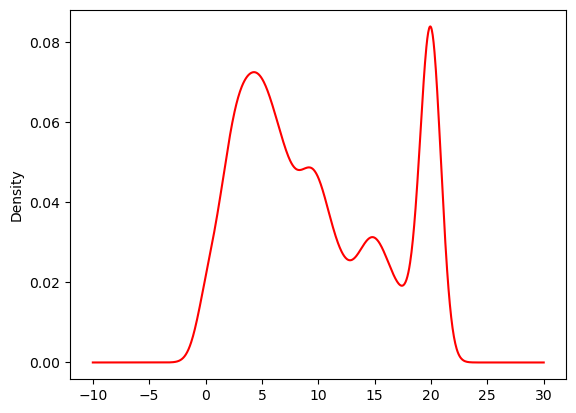

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

In [13]:
#extracting colmuns which have missing values
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [14]:
df[cols].head(10)

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
6,0.920,no_enrollment,High School,5.0,24.0
7,0.762,no_enrollment,Graduate,13.0,18.0
8,0.920,no_enrollment,Graduate,7.0,46.0
9,0.920,no_enrollment,Graduate,17.0,123.0


In [16]:
#applying cca
new_df=df[cols].dropna()

In [17]:
#checking percentage how much data we have left after applying cca
(len(new_df)/len(df))*100

89.68577095730244

In [18]:
new_df.shape,df.shape

((17182, 5), (19158, 13))

# after applying cca

<AxesSubplot: >

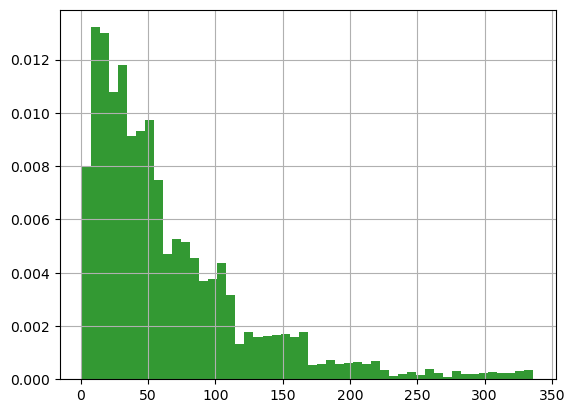

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

# data after cca, the argument alpha makes the color transparent, so we can

new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot: >

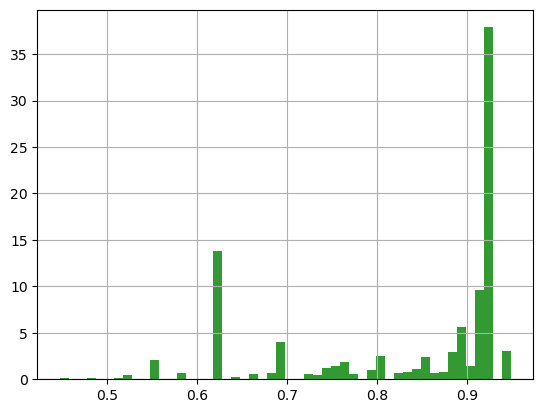

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# data after cca, the argument alpha makes the color transparent, so we can

new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot: >

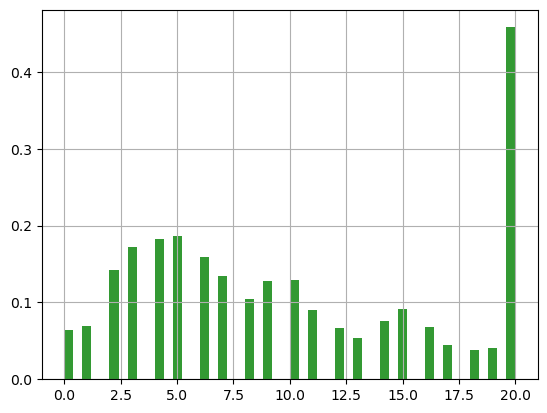

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# data after cca, the argument alpha makes the color transparent, so we can

new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot: ylabel='Density'>

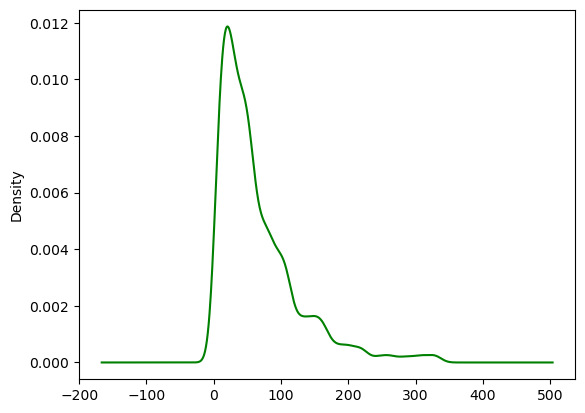

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)



# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot: ylabel='Density'>

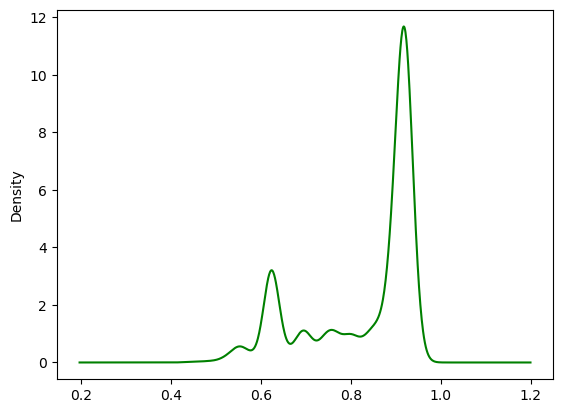

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)



# data after cca
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot: ylabel='Density'>

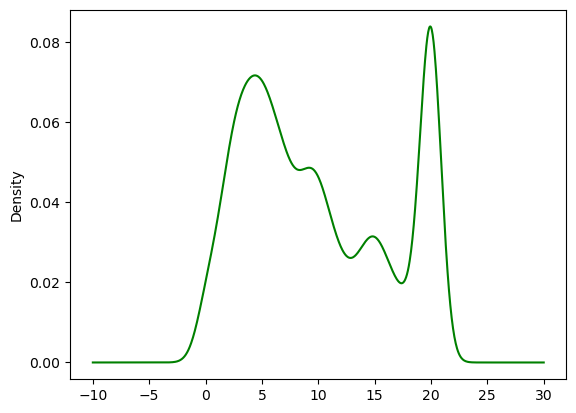

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)



# data after cca
new_df['experience'].plot.density(color='green')

# Checking difference before and after applying cca by combinig these diagrams

<AxesSubplot: >

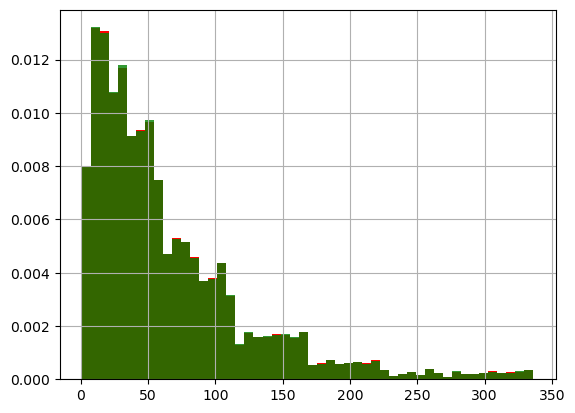

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot: >

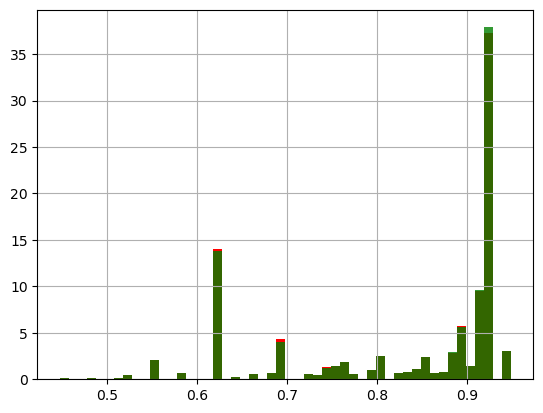

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot: >

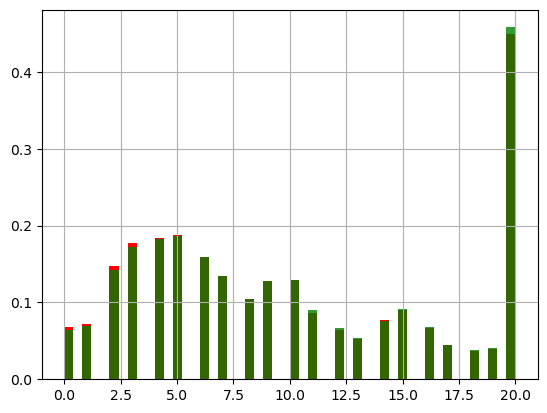

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot: ylabel='Density'>

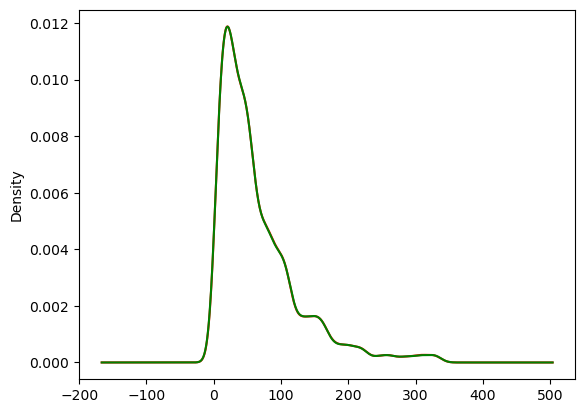

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot: ylabel='Density'>

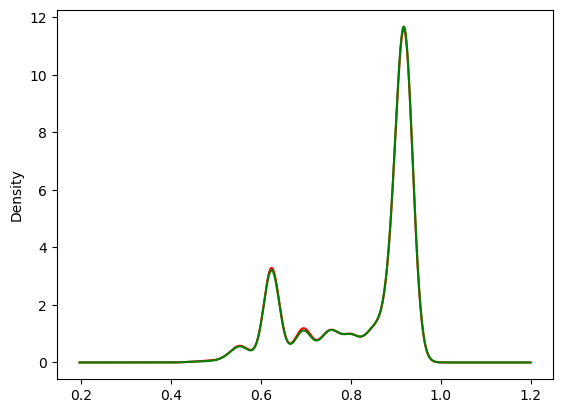

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot: ylabel='Density'>

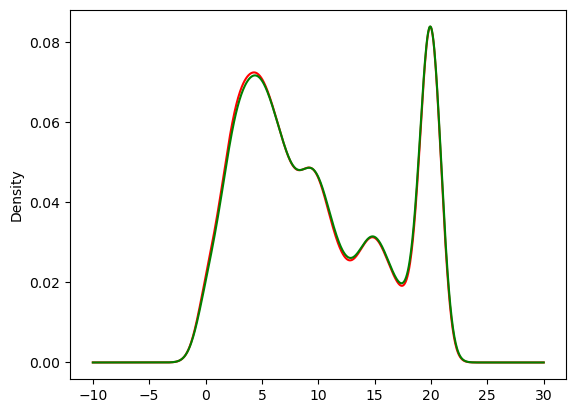

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

# checking between categorical data

In [40]:
#enrolled university column
temp = pd.concat([
            # percentage of observations per category, original data
            (df['enrolled_university'].value_counts() / len(df))*100,

            # percentage of observations per category, cca data
            (new_df['enrolled_university'].value_counts() / len(new_df))*100
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,72.121307,73.518799
Full time course,19.610607,20.073333
Part time course,6.253262,6.407869


In [42]:
#enrolled university column
temp1 = pd.concat([
            # percentage of observations per category, original data
            (df['education_level'].value_counts() / len(df))*100,

            # percentage of observations per category, cca data
            (new_df['education_level'].value_counts() / len(new_df))*100
        ],
        axis=1)

# add column names
temp1.columns = ['original', 'cca']

temp1

,original,cca
Graduate,60.538678,61.983471
Masters,22.763336,23.408218
High School,10.528239,10.737982
Phd,2.160977,2.211617
Primary School,1.607683,1.658713
